In [4]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 64.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 5.7 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 6.8 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import ensemble 
from sklearn import linear_model
from sklearn import metrics 
import seaborn as sns
import sklearn as sk
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from scipy import stats
from scipy.stats import spearmanr, pearsonr

In [6]:
def normal_or_not (group):
    # происходит ли выборка из нормального распределения по тесту Шапиро-Уилка
    W_statistic, w_p_val = stats.shapiro(group)
    print ( 'W_statistic:', round(W_statistic, 3), " \n ", 'w_p_val:', round(w_p_val, 3))
    if round(w_p_val, 3)>=0.05:
        print("Выборочное распределение подчиняется нормальному закону")
    else:
        print("Выборочное распределение не подчиняется нормальному закону")

# Patient clinical data import

In [12]:
patients_data = pd.read_excel('Individual_patients_clinical_data_demography.xlsx')

In [13]:
patients_data.head()

,Sample i.d.,Pathology,Gender,Age (years),BMI (kg/m2),Duration of symptoms (years),WCC x109/L,CRP (mg/l),S100a8a9,ASA grade,CIRS,WOMAC score,SF-12 Ph,SF-12 M
0,16,OA,M,72.06,35.93,10.0,8.4,1.0,6.05,2,7,59.0,34.8,50.4
1,29,OA,F,60.05,28.59,9.0,10.3,1.0,5.26,1,3,72.0,25.5,54.4
2,31,OA,M,69.62,32.19,27.0,6.9,1.0,6.78,2,7,66.0,21.0,57.2
3,35,OA,M,53.63,32.55,3.0,7.2,1.0,5.42,2,5,82.0,23.9,56.4
4,36,OA,F,57.83,34.22,20.0,6.6,1.0,6.37,1,3,66.0,36.2,26.5


In [14]:
patients_data.shape

(33, 14)

In [16]:
nan_patients_data = patients_data[patients_data.isna().any(axis=1)]
len(nan_patients_data)

11

In [17]:
nan_patients_data

,Sample i.d.,Pathology,Gender,Age (years),BMI (kg/m2),Duration of symptoms (years),WCC x109/L,CRP (mg/l),S100a8a9,ASA grade,CIRS,WOMAC score,SF-12 Ph,SF-12 M
15,169,OA,F,54.66,33.56,3.00,4.4,1.0,NaN,2,9,65.0,26.71,40.03
21,88,Scope,M,29.16,25.25,1.00,14.4,1.0,4.50,1,1,NaN,NaN,NaN
24,155,Scope,F,25.25,24.06,1.50,8.8,1.0,NaN,1,1,1.0,52.76,58.52
25,46,Trauma,M,37.33,24.19,0.02,7.6,61.0,4.80,1,3,NaN,NaN,NaN
26,54,Trauma,F,54.33,27.00,0.04,6.8,18.0,5.21,2,12,NaN,NaN,NaN
27,55,Trauma,M,46.00,39.20,0.04,12.2,NaN,NaN,1,6,NaN,NaN,NaN
28,58,Trauma,F,63.00,30.60,0.02,11.7,NaN,5.44,2,7,NaN,NaN,NaN
29,62,Trauma,M,29.27,21.40,0.04,7.2,NaN,NaN,2,6,NaN,60.10,34.77
30,63,Trauma,F,34.82,48.43,0.04,9.2,15.0,3.43,2,5,NaN,61.19,41.46
31,84,Trauma,F,24.42,19.79,0.02,5.4,6.0,2.30,1,0,NaN,46.31,40.36


In [18]:
patients_data.dtypes

Sample i.d.                       int64
Pathology                        object
Gender                           object
Age (years)                     float64
BMI (kg/m2)                     float64
Duration of symptoms (years)    float64
WCC x109/L                      float64
CRP (mg/l)                      float64
S100a8a9                        float64
ASA grade                         int64
CIRS                              int64
WOMAC score                     float64
SF-12 Ph                        float64
SF-12 M                         float64
dtype: object

In [19]:
patients_data.drop(columns='Sample i.d.').describe().round(1)

,Age (years),BMI (kg/m2),Duration of symptoms (years),WCC x109/L,CRP (mg/l),S100a8a9,ASA grade,CIRS,WOMAC score,SF-12 Ph,SF-12 M
count,33.0,33.0,33.0,33.0,30.0,29.0,33.0,33.0,24.0,28.0,28.0
mean,47.6,28.4,4.7,7.3,5.6,5.5,1.5,4.7,47.3,35.2,55.5
std,17.9,6.3,6.7,2.2,12.0,1.6,0.5,3.1,31.5,12.4,11.7
min,19.3,19.8,0.0,4.1,1.0,2.3,1.0,0.0,1.0,13.2,26.5
25%,29.2,24.2,0.5,6.1,1.0,4.8,1.0,2.0,10.5,26.1,45.4
50%,54.3,26.4,1.5,6.8,1.0,5.4,2.0,4.0,62.0,34.3,58.9
75%,60.0,32.6,7.0,7.3,1.0,6.0,2.0,7.0,71.2,44.6,65.2
max,76.0,48.4,27.0,14.4,61.0,10.2,2.0,12.0,96.0,61.2,68.7


<AxesSubplot: >

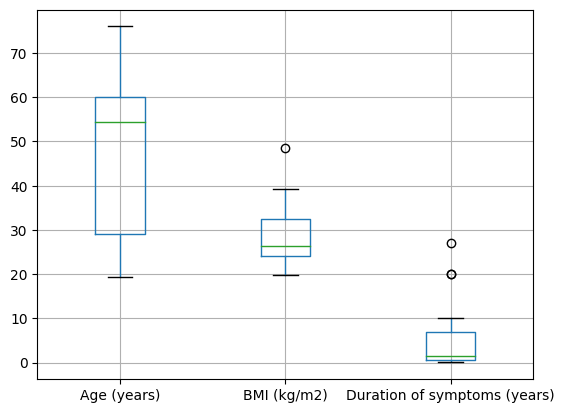

In [10]:
patients_data.boxplot(column = ['Age (years)', 'BMI (kg/m2)', 'Duration of symptoms (years)'])

<Axes: xlabel='Pathology', ylabel='count'>

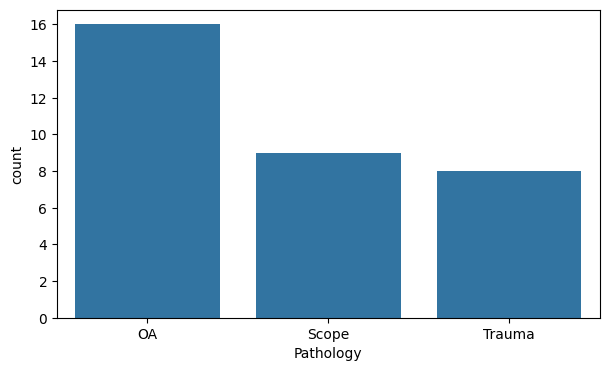

In [21]:
fig, ax = plt.subplots(figsize = (7, 4))
sns.countplot(patients_data, x= 'Pathology')

In [22]:
patients_data.isna().sum()

Sample i.d.                     0
Pathology                       0
Gender                          0
Age (years)                     0
BMI (kg/m2)                     0
Duration of symptoms (years)    0
WCC x109/L                      0
CRP (mg/l)                      3
S100a8a9                        4
ASA grade                       0
CIRS                            0
WOMAC score                     9
SF-12 Ph                        5
SF-12 M                         5
dtype: int64

In [23]:
tissue_histology_data = pd.read_excel('Individual_patients_synovial_tissue_histology_analysis.xlsx')

In [24]:
tissue_histology_data.head()

,Sample i.d.,Pain Score,Synovitis grade,Synovial lining hyperplasia,Density of the resident cells,Inflammatory infiltrate,Presence of cartilage inclusion,Diffuse infiltrate,Peri-vascular focal infiltrate,Peri-cartilage
0,16,7.0,5.0,2.0,1.0,2.0,no,yes,no,no
1,29,10.0,7.0,3.0,2.0,2.0,yes,no,no,no
2,31,9.0,NaN,NaN,NaN,NaN,no,yes,no,no
3,35,5.0,8.0,2.0,3.0,3.0,yes,yes,yes,yes
4,36,10.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND


In [25]:
tissue_histology_data.drop(columns = ['Sample i.d.', 'Pain Score']).describe().round(1)

,Synovitis grade,Synovial lining hyperplasia,Density of the resident cells,Inflammatory infiltrate
count,28.0,28.0,28.0,28.0
mean,6.6,2.1,2.2,2.2
std,1.4,0.8,0.6,0.6
min,3.0,1.0,1.0,1.0
25%,5.8,2.0,2.0,2.0
50%,7.0,2.0,2.0,2.0
75%,8.0,3.0,3.0,3.0
max,9.0,3.0,3.0,3.0


In [15]:
nan_tissue_histology_data = tissue_histology_data[tissue_histology_data.isna().any(axis=1)]
len(nan_tissue_histology_data)

19

In [25]:
tissue_histology_data.isna().sum()

Sample i.d.                         0
Pain Score                         17
Synovitis grade                     5
Synovial lining hyperplasia         5
Density of the resident cells       5
Inflammatory infiltrate             5
Presence of cartilage inclusion     0
Diffuse infiltrate                  0
Peri-vascular focal infiltrate      0
Peri-cartilage                      0
dtype: int64

Данные рг и pain score отсутствуют у групп кроме ОА, пропущены целые признаки
Неизвестно, почему пропущены данные 

<AxesSubplot: xlabel='Synovitis grade', ylabel='count'>

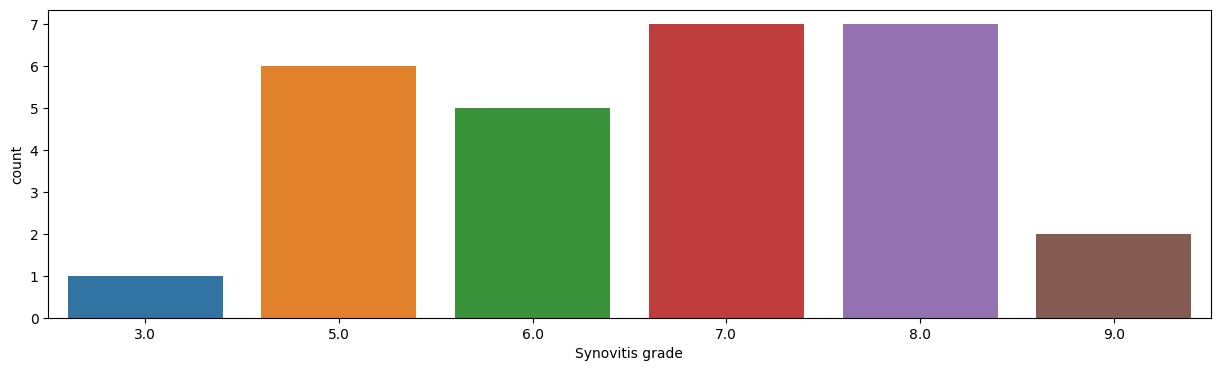

In [26]:
fig, ax = plt.subplots(figsize = (15, 4))
sns.countplot(data=tissue_histology_data, x='Synovitis grade')

In [27]:
tissue_histology_data.dtypes

Sample i.d.                          int64
Pain Score                         float64
Synovitis grade                    float64
Synovial lining hyperplasia        float64
Density of the resident cells      float64
Inflammatory infiltrate            float64
Presence of cartilage inclusion     object
Diffuse infiltrate                  object
Peri-vascular focal infiltrate      object
Peri-cartilage                      object
dtype: object

In [6]:
radiology_data = pd.read_excel('C:/ide/master/datasets/synovial_YOLO_dataset/Patients Demography Dataset/radiology-findings.xlsx')

In [31]:
radiology_data.shape

(16, 11)

In [ ]:
radiology_data.head()

In [7]:
merged_data = patients_data.merge(tissue_histology_data, on='Sample i.d.')
merged_data.head()

,Sample i.d.,Pathology,Gender,Age (years),BMI (kg/m2),Duration of symptoms (years),WCC x109/L,CRP (mg/l),S100a8a9,ASA grade,...,SF-12 M,Pain Score,Synovitis grade,Synovial lining hyperplasia,Density of the resident cells,Inflammatory infiltrate,Presence of cartilage inclusion,Diffuse infiltrate,Peri-vascular focal infiltrate,Peri-cartilage
0,16,OA,M,72.06,35.93,10.0,8.4,1.0,6.05,2,...,50.4,7.0,5.0,2.0,1.0,2.0,no,yes,no,no
1,29,OA,F,60.05,28.59,9.0,10.3,1.0,5.26,1,...,54.4,10.0,7.0,3.0,2.0,2.0,yes,no,no,no
2,31,OA,M,69.62,32.19,27.0,6.9,1.0,6.78,2,...,57.2,9.0,NaN,NaN,NaN,NaN,no,yes,no,no
3,35,OA,M,53.63,32.55,3.0,7.2,1.0,5.42,2,...,56.4,5.0,8.0,2.0,3.0,3.0,yes,yes,yes,yes
4,36,OA,F,57.83,34.22,20.0,6.6,1.0,6.37,1,...,26.5,10.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND


In [8]:
merged_data = merged_data.replace(['ND'],'NaN')
merged_data = merged_data.drop(labels = [4], axis = 0)
merged_data = merged_data.replace(['no'], 0)
merged_data = merged_data.replace(['yes'], 1)

In [9]:
merged_data = merged_data.drop(2)

In [10]:
merged_data.head()

,Sample i.d.,Pathology,Gender,Age (years),BMI (kg/m2),Duration of symptoms (years),WCC x109/L,CRP (mg/l),S100a8a9,ASA grade,...,SF-12 M,Pain Score,Synovitis grade,Synovial lining hyperplasia,Density of the resident cells,Inflammatory infiltrate,Presence of cartilage inclusion,Diffuse infiltrate,Peri-vascular focal infiltrate,Peri-cartilage
0,16,OA,M,72.06,35.93,10.0,8.4,1.0,6.05,2,...,50.4,7.0,5.0,2.0,1.0,2.0,0,1,0,0
1,29,OA,F,60.05,28.59,9.0,10.3,1.0,5.26,1,...,54.4,10.0,7.0,3.0,2.0,2.0,1,0,0,0
3,35,OA,M,53.63,32.55,3.0,7.2,1.0,5.42,2,...,56.4,5.0,8.0,2.0,3.0,3.0,1,1,1,1
5,43,OA,F,63.67,29.02,5.0,7.2,1.0,6.64,2,...,68.3,8.0,8.0,3.0,2.0,3.0,1,1,1,1
6,44,OA,M,71.73,32.70,5.0,6.1,1.0,5.07,2,...,68.0,5.0,6.0,2.0,2.0,2.0,0,1,1,0


In [11]:
Trauma = merged_data.loc[merged_data['Pathology'] == "Trauma"]
Scope = merged_data.loc[merged_data['Pathology'] == "Scope"]

In [12]:
OA = merged_data.loc[merged_data['Pathology'] == "OA"]
merged_OA_data = OA.merge(radiology_data, on='Sample i.d.')

In [18]:
Trauma['Duration of symptoms (years)'].median()
Trauma['Duration of symptoms (years)'].describe()

count    8.00000
mean     0.03000
std      0.01069
min      0.02000
25%      0.02000
50%      0.03000
75%      0.04000
max      0.04000
Name: Duration of symptoms (years), dtype: float64

In [27]:
Trauma['Synovitis grade'].median()
Trauma['Synovitis grade'].describe()

count    6.000000
mean     6.333333
std      2.160247
min      3.000000
25%      5.250000
50%      6.500000
75%      7.750000
max      9.000000
Name: Synovitis grade, dtype: float64

In [19]:
Scope['Duration of symptoms (years)'].median()
Scope['Duration of symptoms (years)'].describe()

count    9.000000
mean     0.944444
std      0.390868
min      0.500000
25%      0.500000
50%      1.000000
75%      1.000000
max      1.500000
Name: Duration of symptoms (years), dtype: float64

In [29]:
Scope['Synovitis grade'].median()
Scope['Synovitis grade'].describe()

count    8.000000
mean     5.750000
std      0.886405
min      5.000000
25%      5.000000
50%      5.500000
75%      6.250000
max      7.000000
Name: Synovitis grade, dtype: float64

In [23]:
merged_data.describe()

,Sample i.d.,Age (years),BMI (kg/m2),Duration of symptoms (years),WCC x109/L,CRP (mg/l),S100a8a9,ASA grade,CIRS,WOMAC score,...,SF-12 M,Pain Score,Synovitis grade,Synovial lining hyperplasia,Density of the resident cells,Inflammatory infiltrate,Presence of cartilage inclusion,Diffuse infiltrate,Peri-vascular focal infiltrate,Peri-cartilage
count,31.000000,31.000000,31.000000,31.000000,31.000000,28.000000,27.000000,31.000000,31.000000,22.000000,...,26.000000,14.000000,28.000000,28.000000,28.000000,28.000000,31.000000,31.000000,31.000000,31.000000
mean,72.032258,46.596452,28.098387,3.443226,7.303226,5.964286,5.462222,1.548387,4.677419,45.590909,...,56.518077,7.428571,6.642857,2.142857,2.250000,2.250000,0.387097,0.870968,0.354839,0.193548
std,34.453334,17.968598,6.426448,4.668076,2.252626,12.348286,1.597080,0.505879,3.166355,32.436985,...,10.640229,2.173770,1.445665,0.755929,0.585314,0.585314,0.495138,0.340777,0.486373,0.401610
min,16.000000,19.340000,19.790000,0.020000,4.100000,1.000000,2.300000,1.000000,0.000000,1.000000,...,34.770000,4.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,28.935000,24.110000,0.270000,6.100000,1.000000,4.660000,1.000000,2.000000,9.500000,...,46.710000,5.250000,5.750000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,63.000000,53.630000,26.300000,1.000000,6.800000,1.000000,5.260000,2.000000,4.000000,56.500000,...,59.850000,7.500000,7.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,89.500000,60.000000,31.575000,5.000000,7.450000,2.250000,5.950000,2.000000,6.500000,71.750000,...,65.755000,9.750000,8.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000
max,169.000000,76.010000,48.430000,20.000000,14.400000,61.000000,10.170000,2.000000,12.000000,96.000000,...,68.660000,10.000000,9.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
merged_data['Synovitis grade'].median()

7.0

Retrying (Retry(total=237, connect=237, read=240, redirect=240, status=240)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001A99BB9A5E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /v2.23/tasks.ping


2024-05-23 23:20:24,391 - clearml.Task - WARNING - ### TASK STOPPED - USER ABORTED - STATUS CHANGED ###


: 

In [20]:
OA['Duration of symptoms (years)'].median()
OA['Duration of symptoms (years)'].describe()

count    14.000000
mean      7.000000
std       5.007686
min       1.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      20.000000
Name: Duration of symptoms (years), dtype: float64

In [25]:
OA['Synovitis grade'].median()
OA['Synovitis grade'].describe()

count    14.000000
mean      7.285714
std       1.069045
min       5.000000
25%       7.000000
50%       7.500000
75%       8.000000
max       9.000000
Name: Synovitis grade, dtype: float64

In [13]:
merged_OA_data.head()

,Sample i.d.,Pathology,Gender,Age (years),BMI (kg/m2),Duration of symptoms (years),WCC x109/L,CRP (mg/l),S100a8a9,ASA grade,...,Location Osteophytes,Grade Osteophytes,Location Joint Space Loss,Grade Joint Space Loss,Subchondral Sclerosis Location,Subchondral SclerosisGrade,Deformity Description,DeformityGrade,K-L Grade,Intraoperative observation notes
0,16,OA,M,72.06,35.93,10.0,8.4,1.0,6.05,2,...,"Tibia, femur & patella but less on tibia",2,Absent medial side,2,Minimal,1,Moderate varus,2,4,Femur: Grade IV both condyles
1,29,OA,F,60.05,28.59,9.0,10.3,1.0,5.26,1,...,Medial tibia; superior & inferior patella; lat...,1,Absent on medial side,2,Medial tibial plateau,2,Moderate varus,2,3,"Grade IV changes medially, Grade III changes p..."
2,35,OA,M,53.63,32.55,3.0,7.2,1.0,5.42,2,...,Mild femur & patella,1,Markedly reduced on medial side,2,No,0,Mild varus,1,3,Grade IV changes medially Grade II changes pat...
3,43,OA,F,63.67,29.02,5.0,7.2,1.0,6.64,2,...,"Medial femur, tibia, patella",1,Decreased on medial side,1,No,0,Mild varus,1,2,Severe medial OA
4,44,OA,M,71.73,32.70,5.0,6.1,1.0,5.07,2,...,"Femur, tibia, patella",2,Virtually complete loss on medial compartment,2,Medial tibial plateau,1,Mild varus,1,4,Grade IV changes laterally Grade IV changes pa...


In [103]:
columns_to_drop = ['Sample i.d.', 'WCC x109/L', 'S100a8a9', 'CRP (mg/l)', 'BMI (kg/m2)']
merged_OA_data_corr = merged_OA_data.drop(columns = columns_to_drop).corr('spearman')

C:\Users\a.bromberg\AppData\Local\Temp\ipykernel_1156\4170048636.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

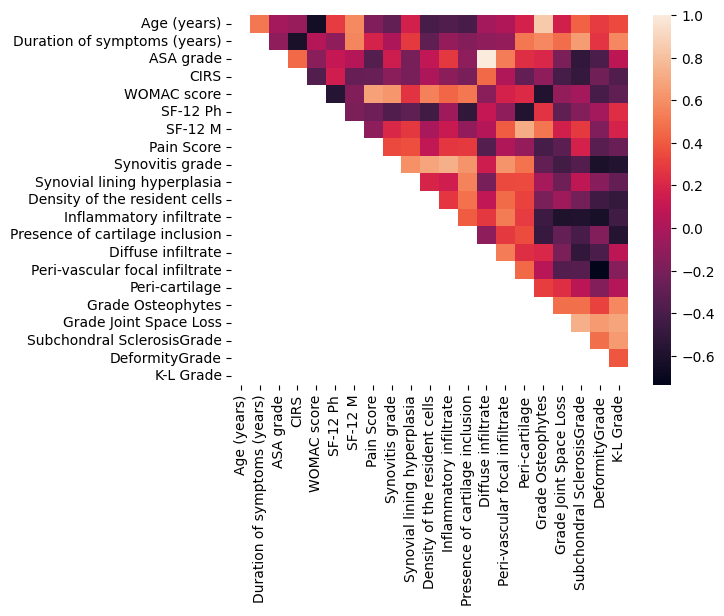

In [104]:
matrix = np.tril(merged_OA_data_corr)
sns.heatmap(merged_OA_data_corr, mask=matrix)

In [106]:
merged_OA_data_corr.round(2).to_excel('spearman_corr.xlsx') 

In [97]:
# так как данные ранговые
def spearman(a, b):
      r_s_stats, p_value_stats = spearmanr(a, b)
      print("Коэффициент корреляции Спирмана:", 
            round(r_s_stats, 4))
      print("p-value:", 
            round(p_value_stats, 4))

In [77]:
def pearson(a, b):
      r_s_stats, p_value_stats = pearsonr(a, b)
      print("Коэффициент корреляции Пирсона:", 
            round(r_s_stats, 4))
      print("p-value:", 
            round(p_value_stats, 4))

In [107]:
a = merged_OA_data['Synovitis grade']
b = merged_OA_data['DeformityGrade']
spearman(a,b)

Коэффициент корреляции Спирмана: -0.6125
p-value: 0.0199


In [108]:
a = merged_OA_data['Synovial lining hyperplasia']
b = merged_OA_data['Presence of cartilage inclusion']
spearman(a,b)

Коэффициент корреляции Спирмана: 0.5477
p-value: 0.0426


In [81]:
a = merged_OA_data['Synovial lining hyperplasia']
b = merged_OA_data['BMI (kg/m2)']
pearson(a,b)

Коэффициент корреляции Пирсона: -0.6928
p-value: 0.006


In [109]:
a = merged_OA_data['Density of the resident cells']
b = merged_OA_data['WOMAC score']
spearman(a,b)

Коэффициент корреляции Спирмана: 0.5404
p-value: 0.0461


In [110]:
a = merged_OA_data['Density of the resident cells']
b = merged_OA_data['Presence of cartilage inclusion']
spearman(a,b)

Коэффициент корреляции Спирмана: 0.479
p-value: 0.0831


In [111]:
a = merged_OA_data['Density of the resident cells']
b = merged_OA_data['Peri-vascular focal infiltrate']
spearman(a,b)

Коэффициент корреляции Спирмана: 0.463
p-value: 0.0955


In [112]:
a = merged_OA_data['Density of the resident cells']
b = merged_OA_data['K-L Grade']
spearman(a,b)

Коэффициент корреляции Спирмана: -0.4955
p-value: 0.0716


In [115]:
a = merged_OA_data['Inflammatory infiltrate']
b = merged_OA_data['Peri-vascular focal infiltrate']
spearman(a,b)

Коэффициент корреляции Спирмана: 0.5222
p-value: 0.0554


In [116]:
a = merged_OA_data['Inflammatory infiltrate']
b = merged_OA_data['Grade Joint Space Loss']
spearman(a,b)

Коэффициент корреляции Спирмана: -0.5943
p-value: 0.025


In [117]:
a = merged_OA_data['Inflammatory infiltrate']
b = merged_OA_data['Subchondral SclerosisGrade']
spearman(a,b)

Коэффициент корреляции Спирмана: -0.5851
p-value: 0.028


In [118]:
a = merged_OA_data['Inflammatory infiltrate']
b = merged_OA_data['DeformityGrade']
spearman(a,b)

Коэффициент корреляции Спирмана: -0.6258
p-value: 0.0167


In [126]:
b = merged_OA_data['Presence of cartilage inclusion']
a = merged_OA_data['WOMAC score']
spearman(a,b)

Коэффициент корреляции Спирмана: 0.5075
p-value: 0.064


In [128]:
b = merged_OA_data['Presence of cartilage inclusion']
a = merged_OA_data['K-L Grade']
spearman(a,b)

Коэффициент корреляции Спирмана: -0.5693
p-value: 0.0336


In [129]:
b = merged_OA_data['Diffuse infiltrate']
a = merged_OA_data['Peri-vascular focal infiltrate']
spearman(a,b)

Коэффициент корреляции Спирмана: 0.5311
p-value: 0.0507


In [132]:
a = merged_OA_data['Diffuse infiltrate']
b = merged_OA_data['Subchondral SclerosisGrade']
spearman(a,b)

Коэффициент корреляции Спирмана: -0.5092
p-value: 0.0629


In [133]:
a = merged_OA_data['Peri-vascular focal infiltrate']
b = merged_OA_data['ASA grade']
spearman(a,b)

Коэффициент корреляции Спирмана: 0.5311
p-value: 0.0507


In [134]:
a = merged_OA_data['Peri-vascular focal infiltrate']
b = merged_OA_data['DeformityGrade']
spearman(a,b)


Коэффициент корреляции Спирмана: -0.7353
p-value: 0.0027


In [136]:
a = merged_OA_data['Peri-cartilage']
b = merged_OA_data['SF-12 Ph']
spearman(a,b)

Коэффициент корреляции Спирмана: -0.5729
p-value: 0.0322


In [119]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
cols_for_ANOVA = ['Pathology', 'Synovitis grade', 'Synovial lining hyperplasia', 'Density of the resident cells', 'Inflammatory infiltrate', 'Presence of cartilage inclusion', 'Diffuse infiltrate', 'Peri-vascular focal infiltrate', 'Peri-cartilage']
clear_data = merged_data[cols_for_ANOVA].dropna()

In [120]:
clear_data.shape

(28, 9)

<AxesSubplot: xlabel='Pathology', ylabel='count'>

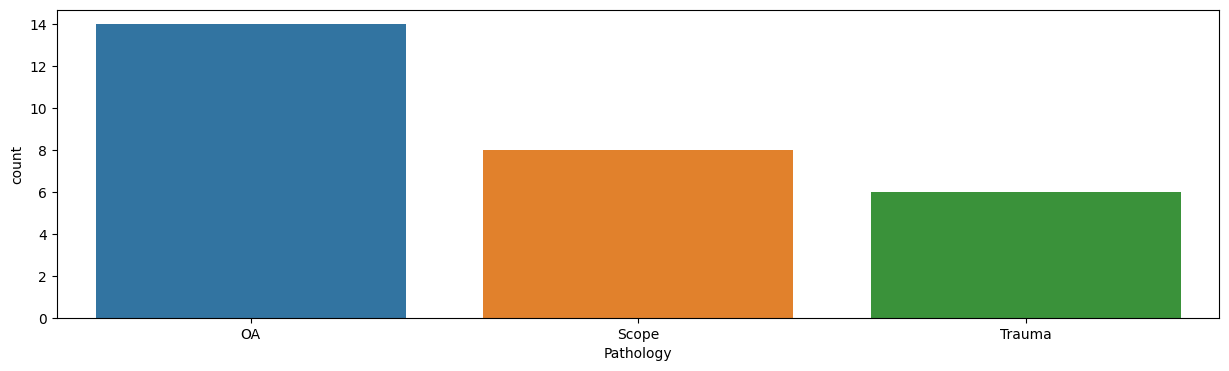

In [51]:
fig, ax = plt.subplots(figsize = (15, 4))
sns.countplot(data=clear_data, x='Pathology')

In [121]:
clear_data = clear_data.rename(columns = {'Synovitis grade':'Synovitis_grade', 'Synovial lining hyperplasia': 'Synovial_lining_hyperplasia', 'Density of the resident cells': 'Density_of_the_resident_cells', 'Inflammatory infiltrate': 'Inflammatory_infiltrate', 'Presence of cartilage inclusion': 'Presence_of_cartilage_inclusion', 'Diffuse infiltrate': 'Diffuse_infiltrate', 'Peri-vascular focal infiltrate':'Peri_vascular_focal_infiltrate', 'Peri-cartilage':'Peri_cartilage'})

In [122]:
stats.shapiro(clear_data['Synovial_lining_hyperplasia'])

ShapiroResult(statistic=0.8051367402076721, pvalue=0.00013167067663744092)

In [123]:
print(stats.shapiro(clear_data['Density_of_the_resident_cells']))

ShapiroResult(statistic=0.7475948333740234, pvalue=1.4471659596893005e-05)


In [55]:
round(1.4471659596893005e-05, 4)

0.0

In [124]:
print(stats.shapiro(clear_data['Inflammatory_infiltrate']))

ShapiroResult(statistic=0.7475948333740234, pvalue=1.4471659596893005e-05)


In [125]:
round(1.4471659596893005e-05, 4)

0.0

In [144]:
clear_data.dtypes

Pathology                           object
Synovitis_grade                    float64
Synovial_lining_hyperplasia        float64
Density_of_the_resident_cells      float64
Inflammatory_infiltrate            float64
Presence_of_cartilage_inclusion      int64
Diffuse_infiltrate                   int64
Peri_vascular_focal_infiltrate       int64
Peri_cartilage                       int64
dtype: object

Согласно документации, tukeyhsd реализует тест для несбалансированных классов

In [147]:
S_hyperplasia_model = ols('Synovial_lining_hyperplasia ~ C(Pathology)', clear_data).fit()

In [148]:
print("Normality test p-value %.3f" % sm.stats.stattools.jarque_bera(S_hyperplasia_model.resid)[2])

Normality test p-value 0.036


In [149]:
print(sm.stats.anova_lm(S_hyperplasia_model  , typ=2).round(2))

              sum_sq    df     F  PR(>F)
C(Pathology)    7.01   2.0  10.4     0.0
Residual        8.42  25.0   NaN     NaN


In [111]:
# comparing the sinovial hyperplasia between each pathology, using 95% confidence interval  
multiComp = MultiComparison(clear_data['Synovial_lining_hyperplasia'], clear_data['Pathology']) 
tukeyres = multiComp.tukeyhsd(alpha = 0.05) 
 
print('Result for the sinovial hyperplasia:', tukeyres) 

Result for the sinovial hyperplasia: Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    OA  Scope  -1.0179 0.0016 -1.6586 -0.3771   True
    OA Trauma  -0.9762 0.0055 -1.6817 -0.2707   True
 Scope Trauma   0.0417 0.9903 -0.7391  0.8225  False
----------------------------------------------------


In [154]:
Density_of_the_resident_cells_model = ols('Density_of_the_resident_cells ~ C(Pathology)', clear_data).fit()
print(sm.stats.anova_lm(Density_of_the_resident_cells_model, typ=2).round(2))

              sum_sq    df     F  PR(>F)
C(Pathology)    0.54   2.0  0.77    0.47
Residual        8.71  25.0   NaN     NaN


Retrying (Retry(total=237, connect=237, read=240, redirect=240, status=240)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002877B9A8250>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /v2.23/tasks.get_all
Retrying (Retry(total=237, connect=237, read=240, redirect=240, status=240)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002877B992C70>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /v2.23/events.add_batch


2024-05-13 06:34:13,809 - clearml.Task - WARNING - ### TASK STOPPED - USER ABORTED - STATUS CHANGED ###


: 

In [112]:
# comparing the Density_of_the_resident_cells between each pathology, using 95% confidence interval  
multiComp = MultiComparison(clear_data['Density_of_the_resident_cells'], clear_data['Pathology']) 
tukeyres = multiComp.tukeyhsd(alpha = 0.05) 
 
print('Result for the Density_of_the_resident_cells:', tukeyres) 

Result for the Density_of_the_resident_cells: Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    OA  Scope   0.1071  0.912 -0.5446 0.7589  False
    OA Trauma   0.3571 0.4416 -0.3604 1.0747  False
 Scope Trauma     0.25 0.7161 -0.5442 1.0442  False
---------------------------------------------------


In [153]:
Inflammatory_infiltrate_model = ols('Inflammatory_infiltrate ~ C(Pathology)', clear_data).fit()
print(sm.stats.anova_lm(Inflammatory_infiltrate_model, typ=2).round(2))

              sum_sq    df     F  PR(>F)
C(Pathology)    2.04   2.0  3.54    0.04
Residual        7.21  25.0   NaN     NaN


In [152]:
# comparing the Inflammatory_infiltrate between each pathology, using 95% confidence interval  
multiComp = MultiComparison(clear_data['Inflammatory_infiltrate'], clear_data['Pathology']) 
tukeyres = multiComp.tukeyhsd(alpha = 0.05) 
 
print('Result for the Inflammatory_infiltrate:', tukeyres) 

Result for the Inflammatory_infiltrate: Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    OA  Scope   -0.625 0.0374 -1.2178 -0.0322   True
    OA Trauma  -0.3333 0.4235  -0.986  0.3193  False
 Scope Trauma   0.2917 0.5802 -0.4307   1.014  False
----------------------------------------------------
